## 1. Bussiness Understanding

Orang-orang yang mencari rumah cenderung lebih konservatif terhadap anggaran dan strategi pasar. Mereka selalu berusaha untuk mengoptimalkan anggaran yang sesuai dengan kebutuhan dan keinginan mereka. Rumah ideal adalah sesuatu yang memenuhi dan sesuai dengan kebutuhan pelanggan dengan anggaran yang sesuai. Jadi, prediksi harga adalah hal yang sangat penting dalam perencanaan anggaran. Kebanyakan orang mendekati manajer real estat atau agen yang memprediksi harga. Ini membantu tetapi juga meningkatkan pengeluaran Anda karena Anda perlu memberikan komisi kepada manajer. Sebaliknya, ketika ada situs web yang memprediksi harga untuk kami, waktu dan uang juga dihemat. Menjadi mudah bagi pelanggan untuk mengaksesnya

* Library yg digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

## 2. Data Understanding

* Menanggil dataset

In [ ]:
df = pd.read_csv('Real estate.csv')

## Deskripsi dataset

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# seleksi fitur colom

In [ ]:
df.drop('No', inplace=True, axis=1)
df.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores ', 'latitude', 'logitude', 'house price of unit area']
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,logitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


1. trasaction data = Mengenai Data transaksi
2. house_age = Mengenai Usia rumah
3. distance_to_the_nearest_MRT_station = Mengenai jarak ke stasiun MRT terdekat
4. number_of_convenience_stores = Mengenai jumlah toko
5. latituted = Mengenai Garis lintang area lokasi rumah  
6. longitude = Mengenai Garis bujur area lokasi rumah

<Axes: >

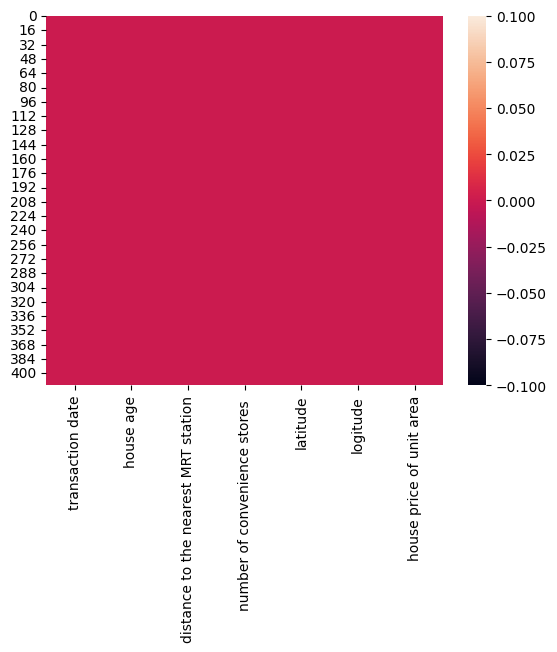

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,logitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Visualisasi data

<Axes: >

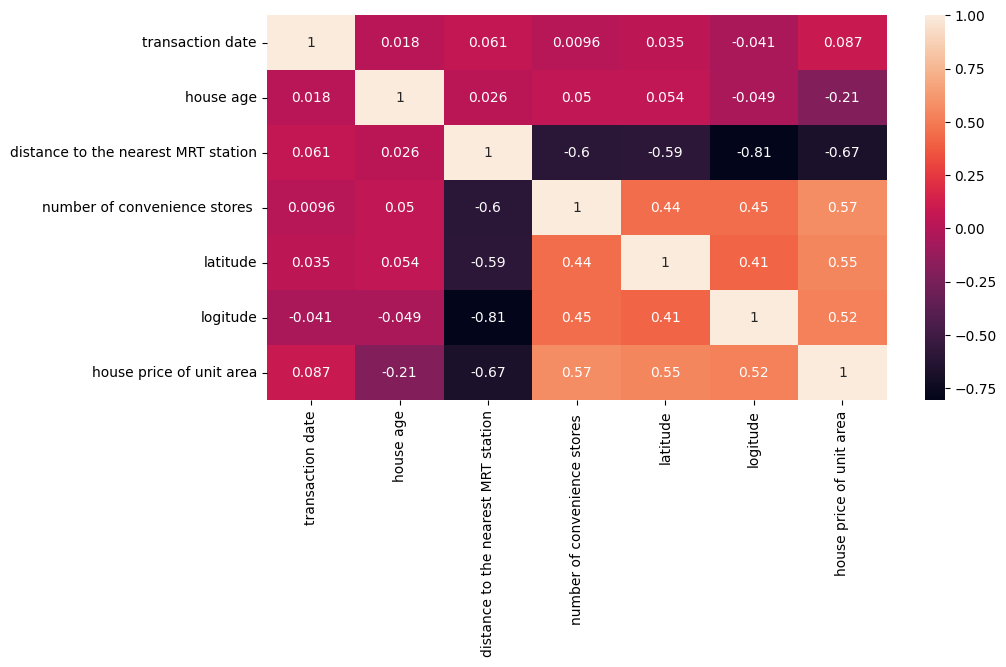

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

warna map menunjukan warna cerah lebih banyak, maka dataset dapat digunakan

* Transaksi data harga unit

<Axes: xlabel='transaction date', ylabel='house price of unit area'>

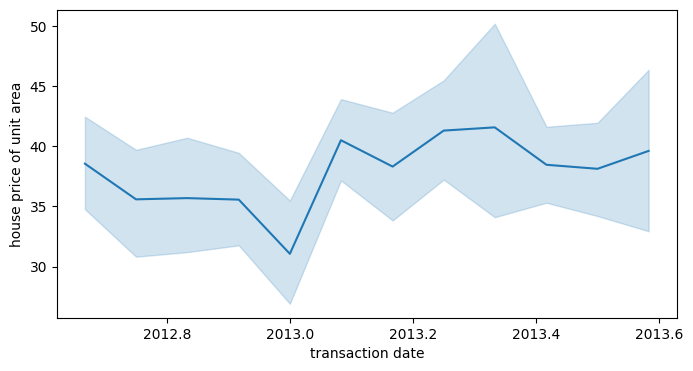

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='transaction date', y='house price of unit area')

* Harga rumah menurut usia

<Axes: xlabel='house age', ylabel='house price of unit area'>

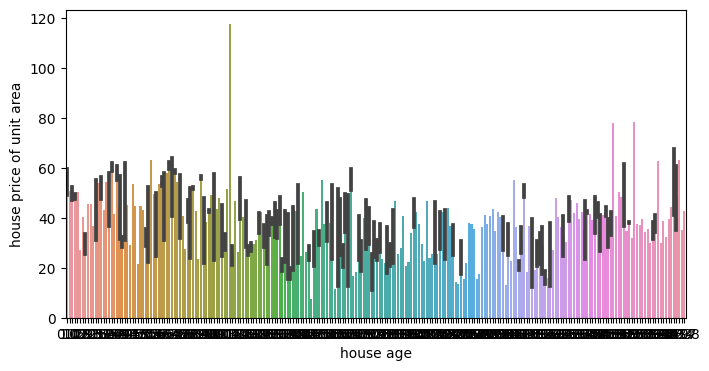

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='house age', y='house price of unit area')

# 3. Data preparation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12532\680574523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['house age'])


<Axes: xlabel='house age', ylabel='Density'>

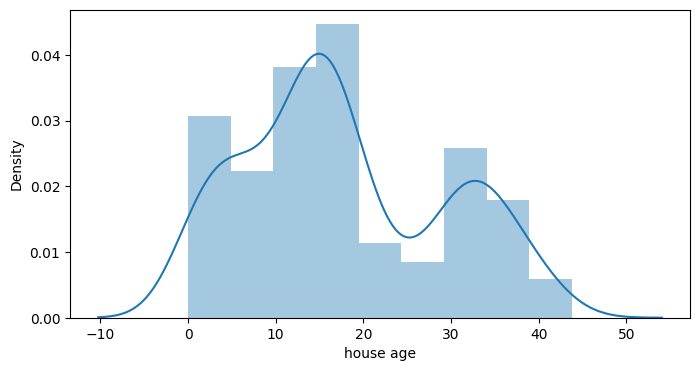

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['house age'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12532\3742438396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['house price of unit area'])


<Axes: xlabel='house price of unit area', ylabel='Density'>

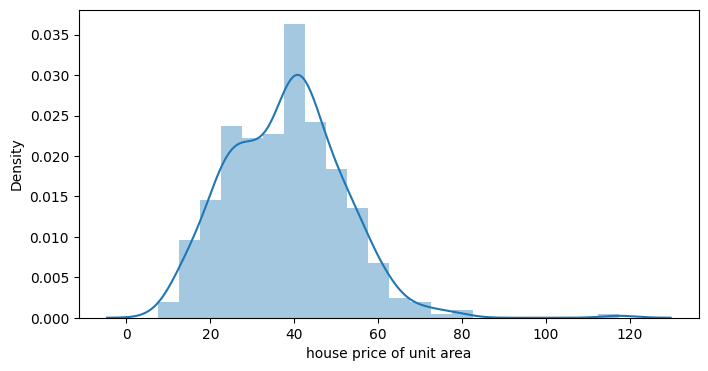

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['house price of unit area'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12532\3949617163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance to the nearest MRT station'])


<Axes: xlabel='distance to the nearest MRT station', ylabel='Density'>

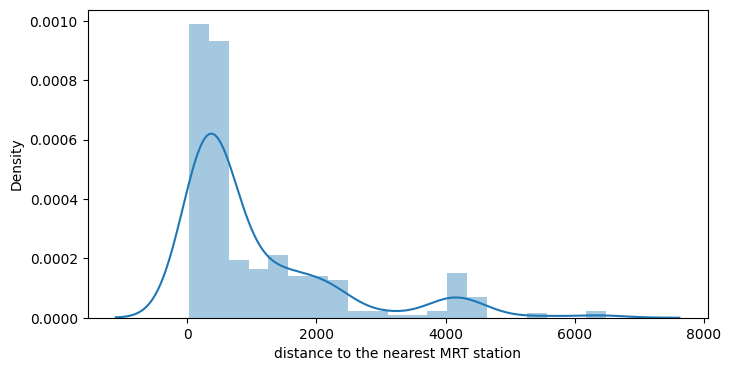

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['distance to the nearest MRT station'])

* Korelasi nilai x dan y

In [ ]:
df.corr().style.background_gradient().set_precision(2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12532\225170090.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,logitude,house price of unit area
transaction date,1.00,0.02,0.06,0.01,0.04,-0.04,0.09
house age,0.02,1.00,0.03,0.05,0.05,-0.05,-0.21
distance to the nearest MRT station,0.06,0.03,1.00,-0.60,-0.59,-0.81,-0.67
number of convenience stores,0.01,0.05,-0.60,1.00,0.44,0.45,0.57
latitude,0.04,0.05,-0.59,0.44,1.00,0.41,0.55
logitude,-0.04,-0.05,-0.81,0.45,0.41,1.00,0.52
house price of unit area,0.09,-0.21,-0.67,0.57,0.55,0.52,1.00


*Dari tabel korelasi diatas dapat menjelaskan bahwa jara MRT sangat berpengaruh terhadapat harga unit dapat dilihat dengan angka yang hampir mendekati satu*
dan dari tabel diatas dapat dilihat bahwa usia rumah tidak terpengaruh dengan harga unit

## 

## split data training dan data testing

In [ ]:
x = df.drop (columns='house price of unit area', axis=1)
y = df['house price of unit area']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(104,)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(414, 6) (310, 6) (104, 6)


# Regresi linier

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_train)

In [ ]:
score = lr.score(x_train, y_train)
print('akurasi model regresi linear=', score)

akurasi model regresi linear= 0.6113442029352765


In [ ]:
lr.fit(x_test, y_test)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linear=', score)

akurasi model regresi linear= 0.5214983772478813


* inputan model regresi linear

In [ ]:
#transaction date =2012.917, house age=32, distance to the nearest MRT station=84.87882, number of convenience stores=10, latitude=24.98298, longitude=121.54024
input_data = np.array([[2012.917, 32, 84.87882, 10, 24.98298, 121.54024]])

prediction = lr.predict(input_data)
print('Estimasi harga unit:', prediction)

Estimasi harga unit: [51.19064444]


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 4. Save Model

In [ ]:
filename = 'estimasi_real_estate.sav'
pickle.dump(lr,open(filename,'wb'))

Model disimpan dalam bentuk 'sav'